# Proyecto: prediccion de eventos letales para datos del ataques al corazon

## Objetivos:

### 1-Comprender el funcionamiento de un modelo de clasificacion de ML
### 2-Completar el proceso de Data Wrangling, Data Adquisition, EDA y Metricas para proyectos de data science
### 3- Realizar predicciones para la variable Target 

In [1]:
import pandas as pd #para manipulacion
import numpy as np # para el modelo
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #graficos rapidos
from pandas.plotting import scatter_matrix # matrix de variables
import warnings
warnings.filterwarnings('ignore') #para ignorar las alertas
import missingno as msno # lo usamos para expresar las missings

## Importamos Librerias

## Dataset

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Exploracion del conjunto de datos

In [3]:
print(data.columns)
print('------------------------------------------------')
print(data.shape)
print('------------------------------------------------')
print(type(data))
print('------------------------------------------------')
print(data.dtypes)
print('------------------------------------------------')
print(data.isnull().sum())
print('------------------------------------------------')
print(data.isna().sum())
print('------------------------------------------------')
print(data.info())


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
------------------------------------------------
(299, 13)
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
------------------------------------------------
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
------------------------------------------------
age                         0
a

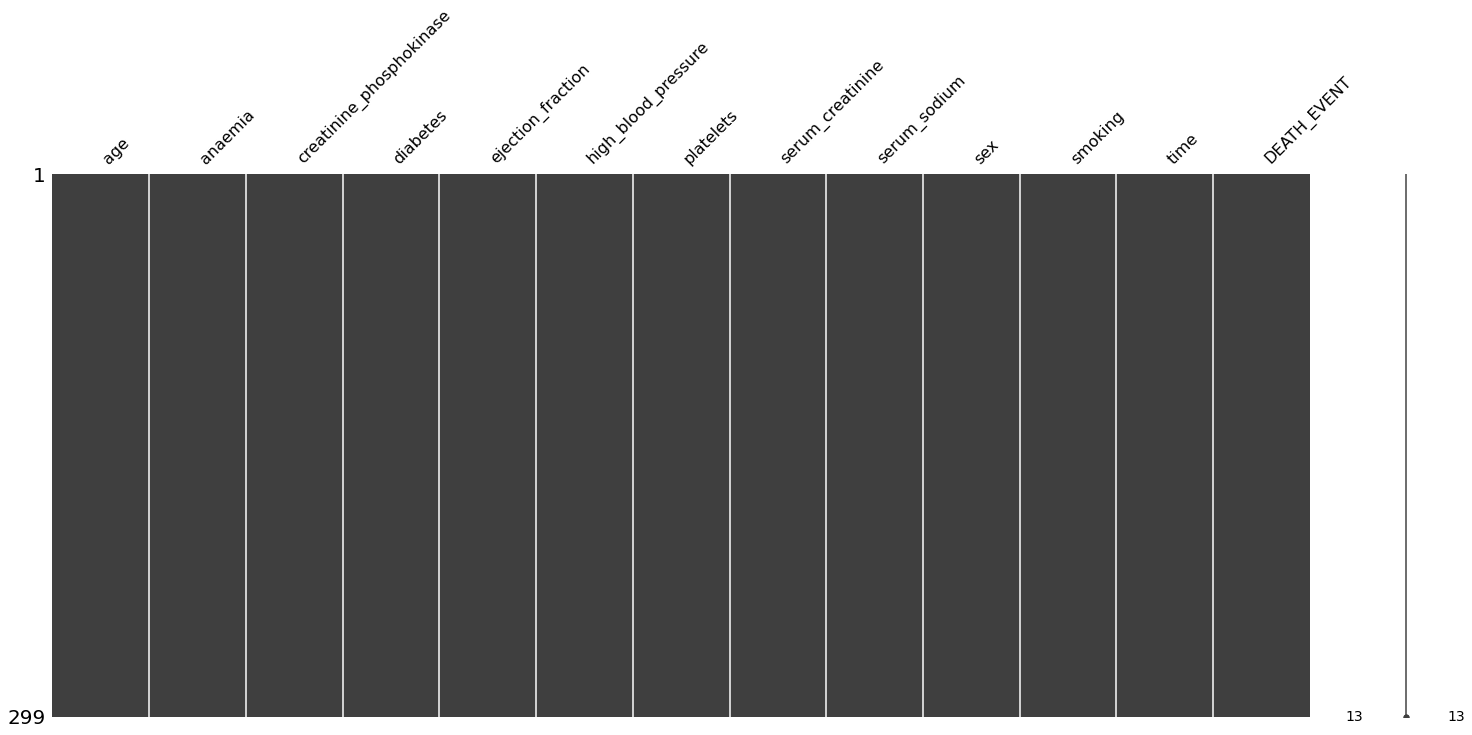

In [4]:
#No hay missings
msno.matrix(data);

### En este punto no tenemos missings, null´s, tenemos variables categoricas(veremos si se las banca el modelo o necesitemos transformar.

### Ahora bien, tenemos los valores en sangre y factores de riesgo para las personas que sufrieron ataques cardiacos, pero sucede lo siguiente... ¿Que sabemos de los ataques cardiacos?

 El ataque cardíaco se produce cuando se bloquea el flujo de sangre que va al corazón. Por lo general, el bloqueo es una acumulación de grasa, colesterol y otras sustancias que forman una placa en las arterias que alimentan el corazón (arterias coronarias).

A veces, una placa puede romperse y formar un coágulo que bloquea el flujo de sangre. La interrupción del flujo de sangre puede dañar o destruir una parte del músculo cardíaco.

 El ataque cardíaco, también llamado infarto de miocardio, puede resultar mortal, pero el tratamiento ha mejorado mucho con los años. Es de suma importancia llamar al 911 o a la ayuda médica de emergencia si crees que estás teniendo un ataque cardíaco.

In [5]:
# Estadisticas descriptivas
data.describe().round(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


###### Ya que tenemos los valores medios de todos los ataques cardiacos, necesitamos hacer foco en alguna variable que tenga que ver directamente con valores anormales para la salud y asi verificar si estos valores 'perjudiciales' tienen relevancia en un posible evento mortal para el paciente.

## Analisis Univariado

### La Fraccion de ejeccion

La fracción de eyección (FE) es una medición, expresada como un porcentaje, de la cantidad de sangre que el ventrículo izquierdo bombea hacia fuera con cada contracción. Una fracción de eyección del 60% se refiere a que el 60% de la cantidad total de sangre del ventrículo izquierdo se bombea con cada latido cardíaco.

Esta indicación de la eficacia con la que el corazón está bombeando sangre puede ayudar a diagnosticar y realizar un seguimiento de la insuficiencia cardíaca.

### Valores Normales y atipicos
-Una fracción de eyección normal del corazón puede estar entre el 50% y el 70%.
-Una medición de la fracción de eyección inferior al 40% puede ser evidencia de insuficiencia cardíaca


<AxesSubplot:>

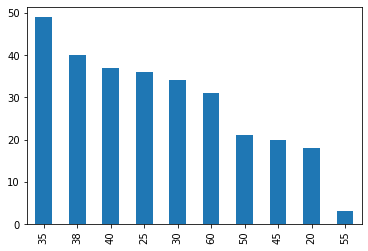

In [6]:
#Variable de cantidad de sodio en suero sanguineo
data['ejection_fraction'].value_counts().head(10).plot.bar()

En este grafico podemos observar que la variable de ejeccion nos dice que para esta muestra tenemos valores, en su mayoria anormales para la salud.

<AxesSubplot:ylabel='Density'>

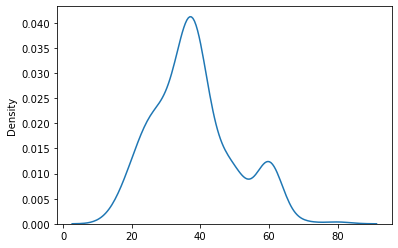

In [7]:
from seaborn import distplot
rango = np.arange(110,150,5)
distplot(x = data.ejection_fraction, kde=True, bins=rango)

<AxesSubplot:xlabel='ejection_fraction'>

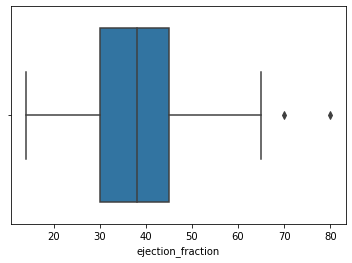

In [8]:
sns.boxplot(x=data["ejection_fraction"])

Una densidad marcada en el rango entre el 30%-45% de ejeccion sanguinea.

In [9]:
# agrupamos segun target para establecer relacion entre la ejeccion y la muerte del paciente
by_DH1 = data.groupby('DEATH_EVENT').mean().round(1)[['ejection_fraction']]
by_DH1

,ejection_fraction
DEATH_EVENT,
0,40.3
1,33.5


## Suero creatininico 

#### ¿Qué es creatinina Serum?
Es un análisis de sangre que mide qué tan bien funcionan sus riñones. Limpiar y filtrar los productos de desechos de su sangre son funciones renales importantes. La creatinina es un producto de desecho normal que se acumula en su sangre por el uso de sus músculos, en el contexto de un ataque cardiaco, mide el estres que sufre el musculo cardiaco.
La determinación de la creatinina en el momento del ataque cardiaco es una de las variables importantes en la estratificación pronóstica inicial de estos pacientes. Las concentraciones de creatinina más elevadas aumentan la probabilidad de muerte por todas las causas.

###### El rango normal de creatinina sérica es el siguiente:  
-Para hombres adultos, de 0,74 a 1,35 mg/dL     
-Para mujeres adultas, de 0,59 a 1,04 mg/dL

In [10]:
#media de valores de suero sanguineo agrupados por evento
by_DH = data.groupby('DEATH_EVENT').mean().round(2)[['serum_creatinine']]
by_DH

,serum_creatinine
DEATH_EVENT,
0,1.18
1,1.84


Segun el dataset el evento mortal se presenta en pacientes con valores de creatinina mas elevados.

<AxesSubplot:>

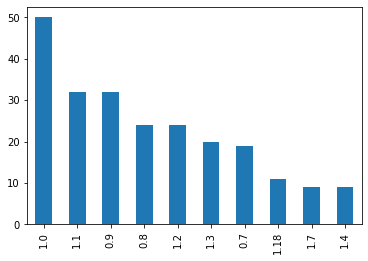

In [11]:
data['serum_creatinine'].value_counts().head(10).plot.bar()

# Analisis Bivariado y Multivariado

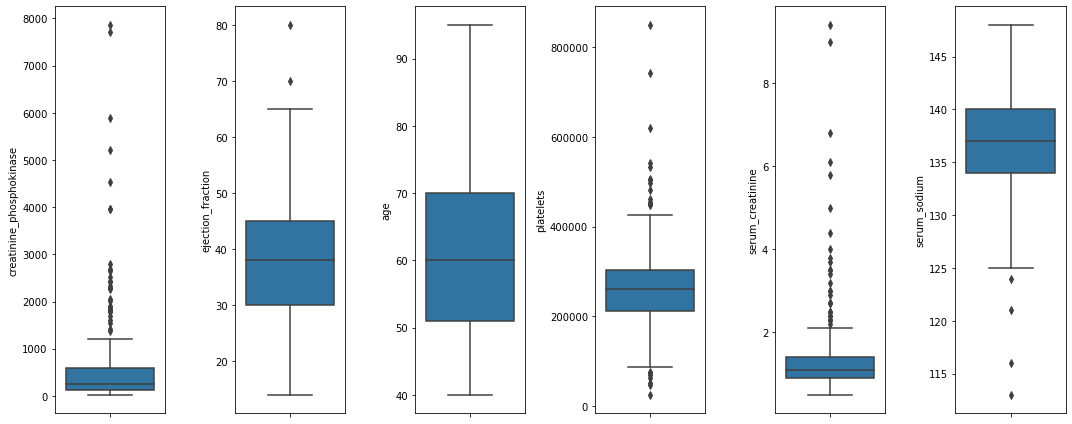

In [12]:
# observacion de distintas variables numericas
variables =['creatinine_phosphokinase','ejection_fraction','age','platelets','serum_creatinine',
             'serum_sodium']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=data, ax=ax)
plt.tight_layout()

## Factores de riesgo: Edad

##### Si bien este indicador no es una estudio de laboratorio, esta comprobado que la edad es un factor de riesgo que predispone a cualquier paciente a un evnto mortal

In [13]:
#evento mortal segun edad y valores de laboratorio
by_age = data.groupby('DEATH_EVENT').mean().round(1)[['age',
                                                      'serum_sodium',
                                                      'serum_creatinine',
                                                      'ejection_fraction',
                                                      'platelets',
                                                      'creatinine_phosphokinase']]
by_age

,age,serum_sodium,serum_creatinine,ejection_fraction,platelets,creatinine_phosphokinase
DEATH_EVENT,,,,,,
0,58.8,137.2,1.2,40.3,266657.5,540.1
1,65.2,135.4,1.8,33.5,256381.0,670.2


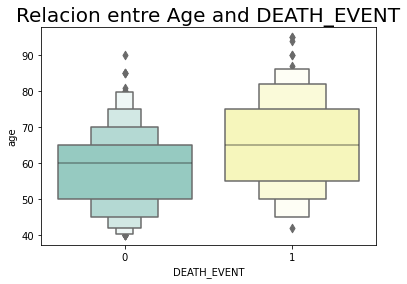

In [14]:
sns.boxenplot(data['DEATH_EVENT'], data['age'], palette = 'Set3')
plt.title('Relacion entre Age and DEATH_EVENT', fontsize = 20, fontweight = 30)
plt.show()

Como vemos la media de edad para cada posibilidad que nos da el target es mas alta para el evento mortal positivo, es decir, que las personas que facellen por el ataque cardiaco son, en promedio, mas avanzadas de edad.

## Edad, duracion de la fase aguda y factores de riesgo

Ajustamos el target para las variables binarias que reflejan los factores de riesgo

In [15]:
#Filtramos la data y realizamos una agrupacion
fac_stats = data.groupby(['DEATH_EVENT','diabetes', 'high_blood_pressure','smoking']).mean().round(1)[['age', 'time']]
fac_stats

age   time
DEATH_EVENT diabetes high_blood_pressure smoking             
0           0        0                   0        60.6  167.2
                                         1        57.1  160.9
                     1                   0        60.9  139.6
                                         1        59.6  125.0
            1        0                   0        56.5  173.2
                                         1        59.3  160.5
                     1                   0        58.9  135.2
                                         1        61.3  189.7
1           0        0                   0        66.4   76.6
                                         1        67.7   95.0
                     1                   0        64.5   71.7
                                         1        70.9   38.1
            1        0                   0        59.9   85.4
                                         1        65.1   63.3
                     1                   0        64.9   63.5
                                         1        64.4   38.0

Podemos afirmar que, en promedio, una evento mortal sucede mas pronto y a una edad mas joven sabiendo que tenemos un paciente con 2 o mas factores de riesgo como la diabetes, hipertension y si es una persona fumadora

## Correlaciones

In [16]:
#correlaciones
correlation = data.corr()
correlation.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603


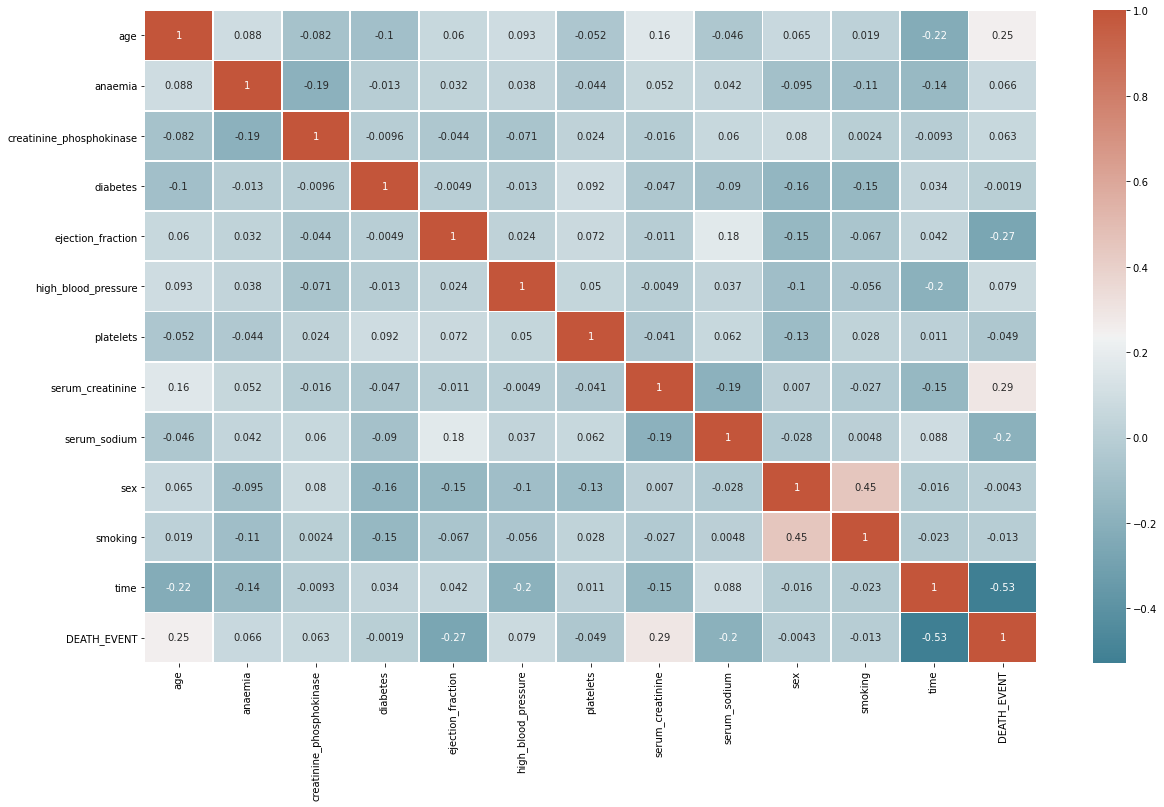

In [17]:
#correlaciones para todas las variables
plt.figure(figsize=[20,12])
divergente = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data.corr(), cmap= divergente, annot= True, linewidths=.8)
plt.show()


## Separamos variables numericas y vemos correlacion con el target

In [18]:
data1 = data[['creatinine_phosphokinase',
              'age',
              'ejection_fraction',
              'platelets',
              'serum_creatinine',
              'serum_sodium',
              'time',
              'DEATH_EVENT']]

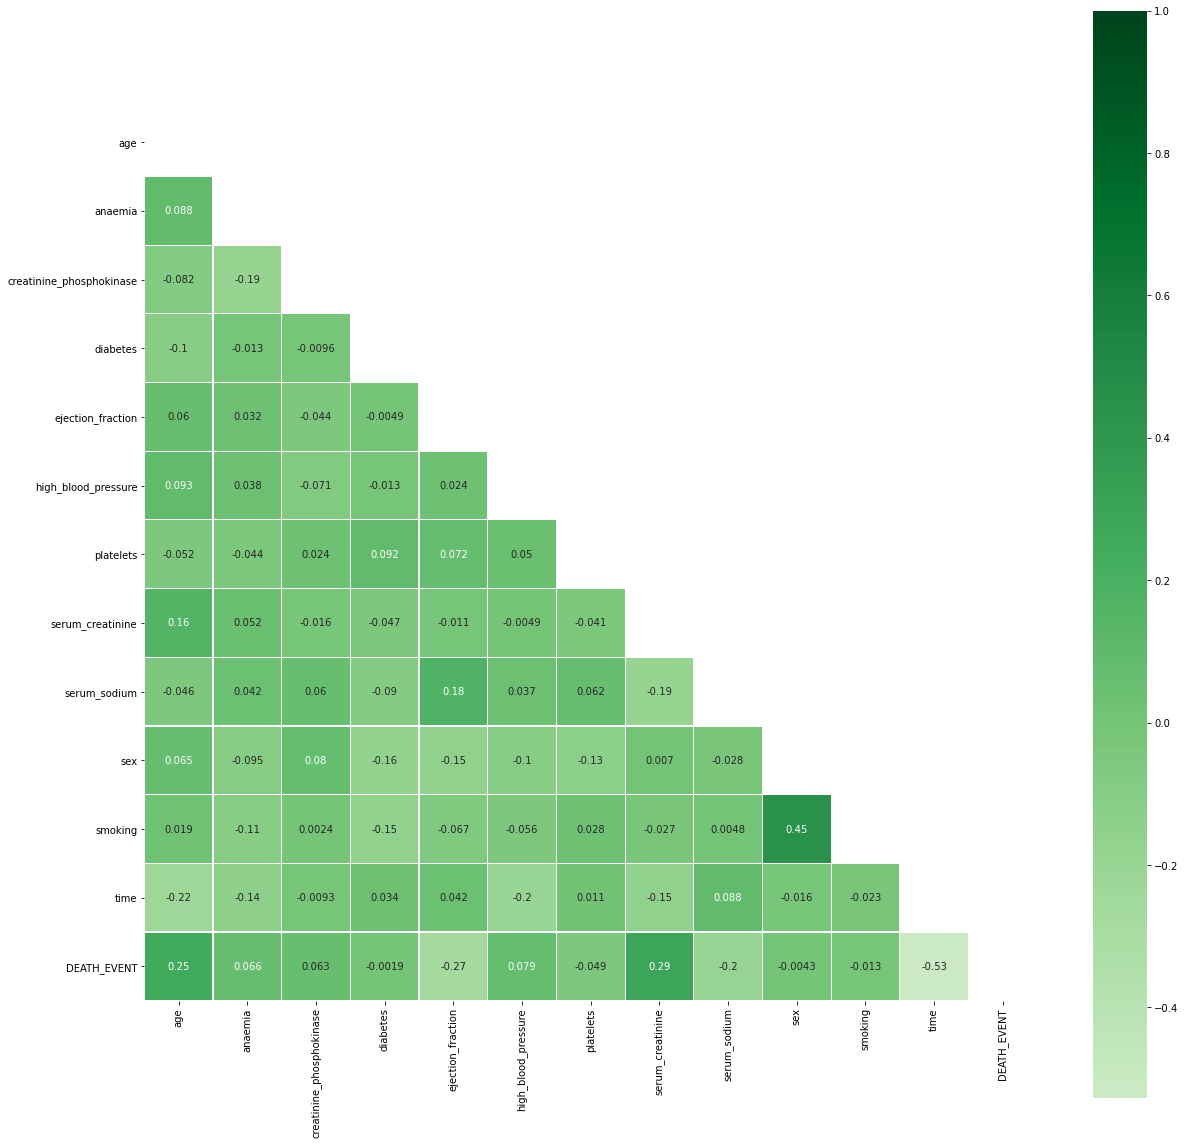

In [19]:
#visualizamos las correlaciones de las variables cuantitativas 
cor = data.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(cor, mask=mask,cmap='Greens',vmax=1,center=0,
           square=True, linewidths=.1,annot=True);

## Vemos la correlacion entre variables binarias

In [20]:
data2 = data[['anaemia', 'diabetes',
       'high_blood_pressure', 'smoking',
       'DEATH_EVENT']]

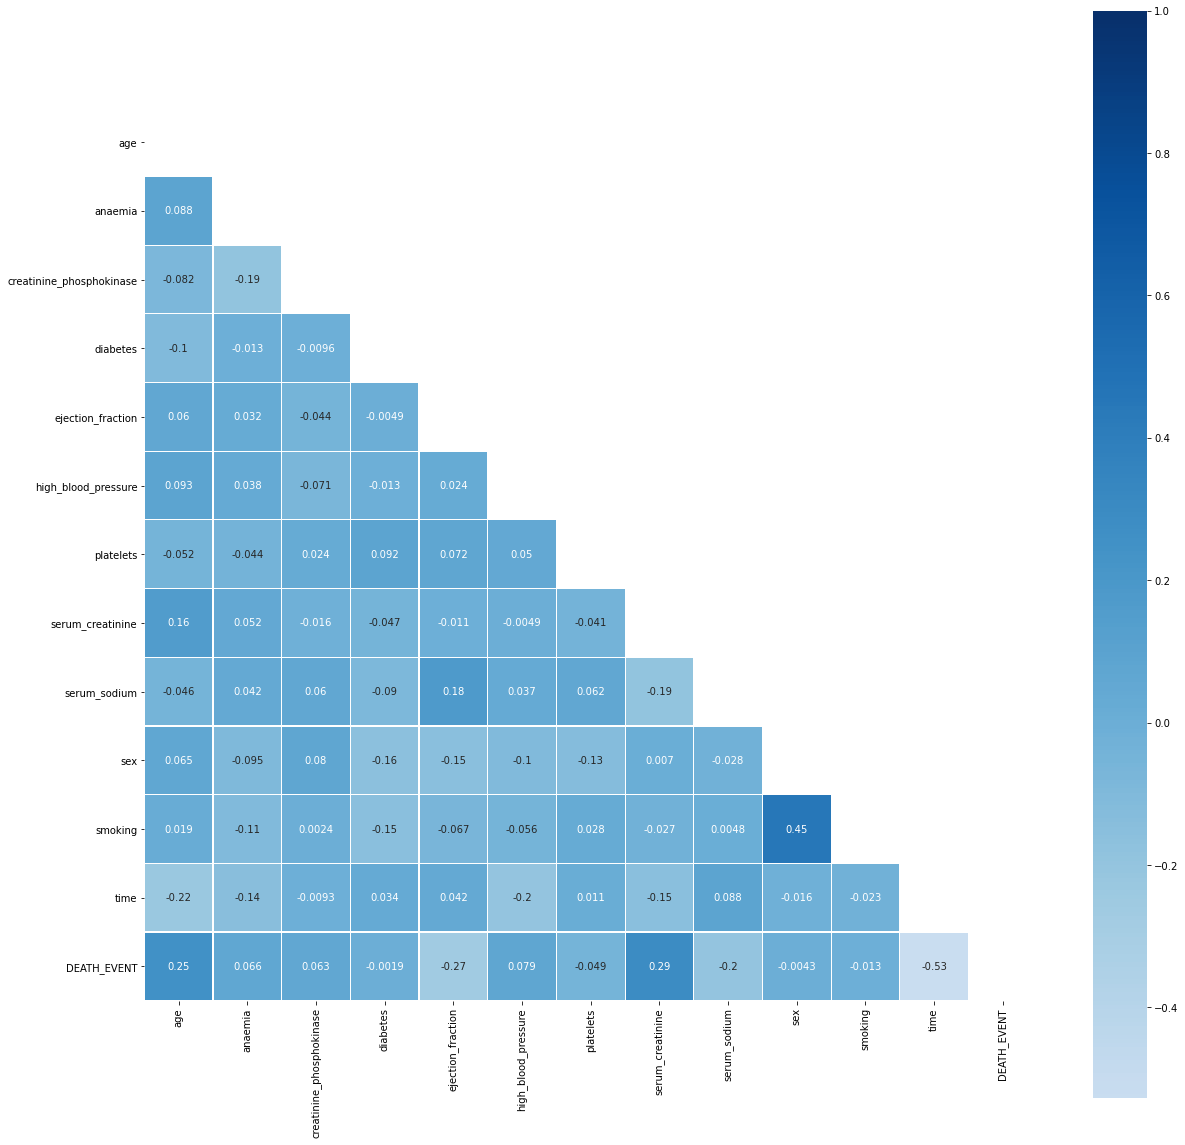

In [21]:
#Heat map de variables categoricas
data2.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(cor, mask=mask,cmap='Blues',vmax=1,center=0,
           square=True, linewidths=.1,annot=True);

## Probamos algunos modelos de clasificacion

### Arbol de decision para las variables categoricas

Marcamos las particiones para preparar el modelo

In [22]:
X = data.drop("DEATH_EVENT", axis=1) 
y = data.DEATH_EVENT 

Spliteamos en un size de 70/30

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

Importamos el modelo, entrenamos y predecimos

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree_ha = DecisionTreeClassifier()
tree_ha.fit(X_train, y_train)
tree_train_pred = tree_ha.predict(X_test)

Importamos las metricas para el accuracy

In [25]:
from sklearn.metrics import accuracy_score, recall_score

In [26]:
train_accuracy = accuracy_score(y_test, tree_train_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6444444444444445


In [27]:
accuracy_score(y_test, tree_train_pred)

0.6444444444444445

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(tree_ha, X_test, tree_train_pred, cv =4, scoring='recall')

array([0.75      , 0.71428571, 0.42857143, 0.42857143])

### En esta instancia nos percatamos que las ultimas dos folds dan un mejor desempeño en cuanto a true positives relativos al numero o cantidad total de positivos reales. Sin embargo, debemos tener en cuenta la cantidad de falsos negativos para este caso, puesto que, estamos tratando con eventos mortales.

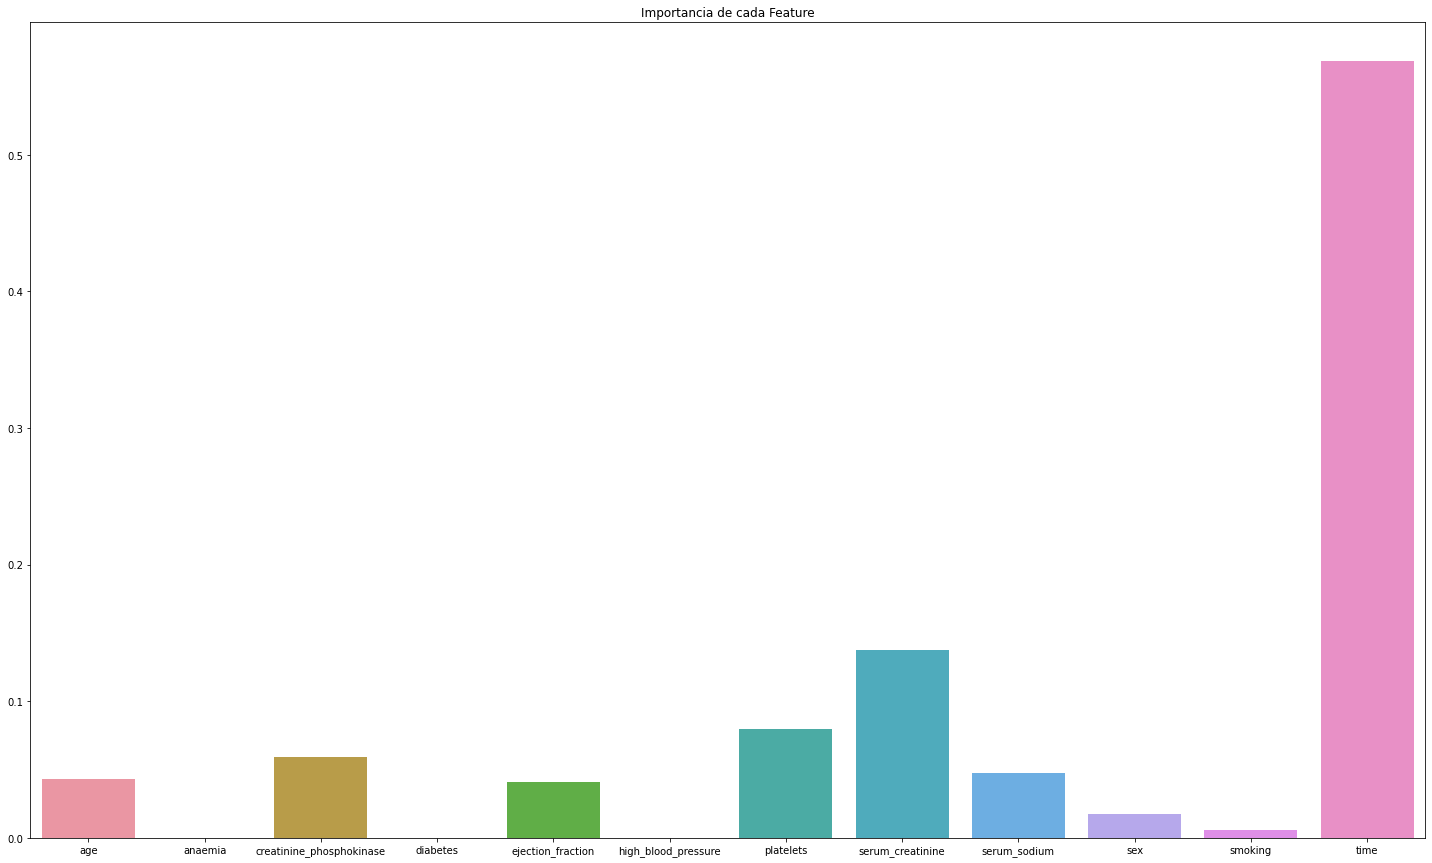

In [30]:
#Importancia de las variables

plt.figure(figsize=(25,15))
importances = tree_ha.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Aca nos damos cuenta de las features mas importantes para el modelo

Vemos la matriz de confusion para ver la cantidad de aciertos 

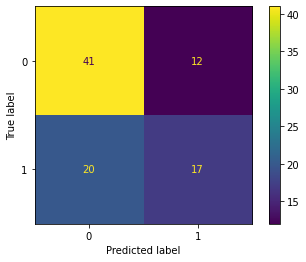

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree_ha, X_test, y_test)  
plt.show()

A simple vista al modelo interpreta que 18 eventos mortales no serian predecidos correctamente.


## Probamos con la regression logistica

Antes que nada escalamos los datos y transformamos 

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Importamos Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
log_ha = LogisticRegression(max_iter=500)
log_ha.fit(X_train, y_train)
log_train_pred = log_ha.predict(X_test)

accuracy score

In [34]:
accuracy_score(y_test, log_train_pred)

0.7333333333333333

Vemos el Recall score

In [35]:
recall_score(y_test, log_train_pred)

0.43243243243243246

Cross Validation

In [36]:
cross_val_score(log_ha, X_train, y_train, cv= 4, scoring='recall')

array([0.66666667, 0.85714286, 0.4       , 0.53333333])

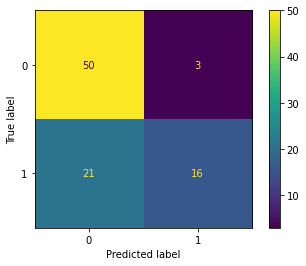

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_ha, X_test, y_test)  
plt.show()

Vemos que mejora el accuracy con regresion logistica, aunque empeora los falsos negativos

## Random Forest Classifier

Creamos un arbol de decisión sencillo y lo fiteamos

In [38]:
tree1 = DecisionTreeClassifier(random_state=11)
tree1.fit(X_train, y_train)
y_test_pred = tree1.predict(X_test)

Accuracy del arbol

In [39]:
accuracy_score(y_test ,y_test_pred)

0.6666666666666666

Importamos el modelo, fiteamos y predecimos

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_ha = RandomForestClassifier()
rf_ha.fit(X_train,y_train)
rf_pred = rf_ha.predict(X_test)
accuracy_score(y_test, rf_pred)

0.7555555555555555

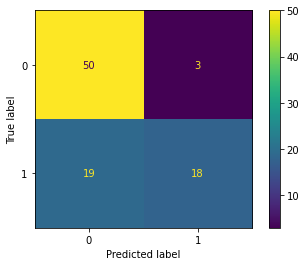

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_ha, X_test, y_test)  
plt.show()


El random forest mejora reduciendo los falsos positivos pero la cantidad de falsos negativos sigue igual

# Por el momento en algun punto necesitamos optimizar el modelo de regression logistica para obtener mejores resultados o realizar transformaciones a las variables.

# grid search

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
#Separamos en X e y 
X = data.drop("DEATH_EVENT", axis=1) 
y = data.DEATH_EVENT 

In [145]:
validation_size = 0.20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size,
                                                                               shuffle=True,
                                                                                stratify=y,
                                                                            random_state=None)

In [146]:
#Creamos nuestro objeto clf
logistic_Reg = LogisticRegression()
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()

#uso de Pipeline para GridSearchCV
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('logistic_Reg', logistic_Reg)])
#parametros para logistic regression
C = np.logspace(-4, 4, 20)
penalty = ['l1','l2']
solver= ['liblinear','newton-cg', 'lbfgs', 'sag', 'saga']
warm_start = ['True']


#creamos el param_grid
param_grid = dict(logistic_Reg__C=C,
                  logistic_Reg__penalty=penalty,
                 logistic_Reg__solver=solver)

In [148]:
#creamos el modelo gs 
clf_GS = GridSearchCV(pipe, param_grid)
clf_GS.fit(X_train ,y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2'],
                         'logistic_Reg__solver': ['liblinear', 'newton-cg',
                                                  'lbfgs', 'sag', 'saga']})

In [143]:

print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best solver:', clf_GS.best_estimator_.get_params()['logistic_Reg__solver'])
print('Best score:', clf_GS.best_score_)
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l1
Best C: 0.23357214690901212
Best solver: saga
Best score: 0.805593220338983

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='saga')


## predecimos con el modelo 

In [152]:
predict = clf_GS.predict(X_test)
accuracy_score(y_test, predict)

0.8833333333333333

## Matriz de confusion

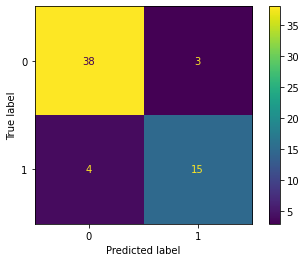

In [155]:
plot_confusion_matrix(clf_GS, X_test, y_test)  
plt.show()

### KFold cross validation

In [159]:
from sklearn import model_selection

name='Logistic Regression'
kfold = model_selection.KFold(n_splits=5, random_state=None)
cv_results = model_selection.cross_val_score(clf_GS, X_train, y_train, cv=kfold, scoring='accuracy')

In [166]:
msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(),cv_results.std())
print(msg)

Logistic Regression: 0.825 (0.062)


## Gradient Boosting

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [170]:
gb_score = gb.score(X_test, y_test)
print(gb_score)

0.85


# Conclusion

Si bien tenemos varios ejemplos de modelos para intentar predecir el evento mortal dado un ataque cardiaco, necesitamos mas datos sobre factores como precencia de obesidad, causa del ataque (si es por hemorragia u oclusion) y/o si el paciente tiene patologias cardiacas previas al evento. 
Se logro mejorar la performance de los modelos utilizando gradient boosting y tambien grid search con los mejores parametros.